In [1]:
import pandas as pd
#model part 
#read the data
data = pd.read_csv("/Users/weijiepan/Desktop/506_project/506_project_data.csv")
data = data.drop(["Unnamed: 0"],axis=1)

In [2]:
#create intecept terms
colnames=["iron","calcium","zine","sodium","VE","VA","alcohol","VC",
     "fat","dietary fiber","sugar","carbohydrate","energy","protein"]
for i in colnames:
    data[i+"_ins"] = data[i]*data["insurance"]

In [3]:
#divide it into X(preditors) y(result)
X = data.drop(["id","diabetes","insurance"],axis=1)
y = data["diabetes"]

In [4]:
#deal with categorical features
#age, gender, income
gender = pd.get_dummies(X['gender'],drop_first=True)
gender.columns=["gender"+str(i) for i in gender.columns]

age = pd.get_dummies(X['age'],drop_first=True)
age.columns=["age"+str(i) for i in age.columns]

income = pd.get_dummies(X['income'],drop_first=True)
income.columns=["income"+str(i) for i in income.columns]

X.drop(['gender','age','income'],axis=1,inplace=True)

X = pd.concat([X,gender,age,income],axis=1)

In [5]:
#split it into training set and test set
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.2,
                                                                    random_state=42,
                                                                    stratify=y)

In [6]:
#build the model
from sklearn.metrics import accuracy_score 
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(penalty='l1',scoring='roc_auc',solver="saga",
                             cv=10,class_weight={1:.9,0:.1},max_iter=1000)
model.fit(X_train,y_train)

/Users/weijiepan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegressionCV(Cs=10, class_weight={0: 0.1, 1: 0.9}, cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=None,
                     penalty='l1', random_state=None, refit=True,
                     scoring='roc_auc', solver='saga', tol=0.0001, verbose=0)

In [7]:
import matplotlib.pyplot as plt

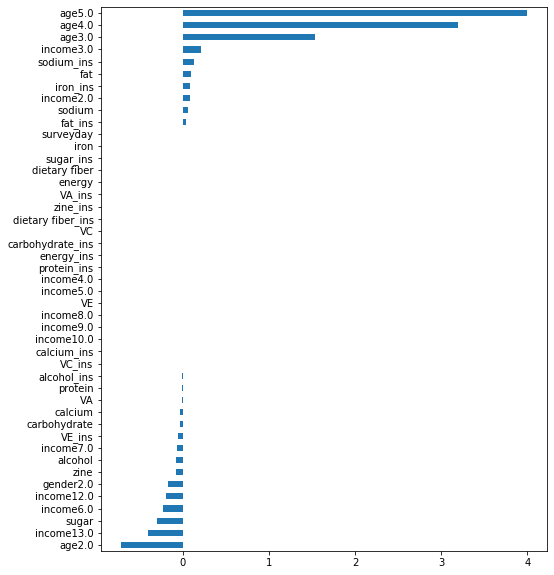

In [8]:
#display the coef (sorted)
coef = pd.Series(model.coef_[0,:], index = X_train.columns)
plt.rcParams['figure.figsize'] = (8.0, 10.0)
coef.sort_values().plot(kind="barh")

In [9]:
#accuracy of the model
accuracy_score(y_test,model.predict(X_test))

0.7157417893544734

In [10]:
from sklearn.metrics import roc_curve
#plot auc curve 
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [11]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.849


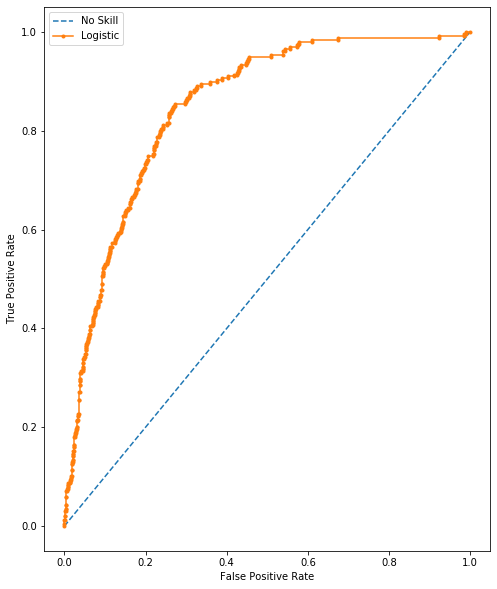

In [12]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()